In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [3]:
def find_extinction_time(b):

    ## random edge matrix
    E = np.random.randint(0,N,size=2*M).reshape((N*30, 2))

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def extinction_time_simulation(b_array):

    extinction_times = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction = 0

        if round(find_extinction_time(b)) == Tmax:
            
            extinction_times[i] = Tmax
        
        else:
        
            for t in range(20):

                extinction += find_extinction_time(b)

            extinction_times[i] = extinction / 20
        
        print(extinction_times[i])
    
    return extinction_times


In [4]:
b_array1 = [1/1000, 1/750, 1/500]
results1 = extinction_time_simulation(b_array1)
print(results1)



9.607973536654251
9.953029944742216
9.492011539305148
[9.60797354 9.95302994 9.49201154]


In [5]:
b_array2 = [1/250, 1/200, 1/150]
results2 = extinction_time_simulation(b_array2)
print(results2)



10.483571141606202
12.015411580341686
13.012964027656787
[10.48357114 12.01541158 13.01296403]


In [7]:
b_array3 = [0.01, 0.012, 0.014]
results3 = extinction_time_simulation(b_array3)
print(results3)



18.139969589047176
23.79167786660411
35.100200154965435
[18.13996959 23.79167787 35.10020015]


In [8]:
b_array4 = [0.016, 0.018, 0.02]
results4 = extinction_time_simulation(b_array4)
print(results4)



72.04020068397375
1000.0
1000.0
[  72.04020068 1000.         1000.        ]


In [9]:
b_array5 = [0.021, 0.022, 0.023]
results5 = extinction_time_simulation(b_array5)
print(results5)



1000.0
1000.0
1000.0
[1000. 1000. 1000.]


In [10]:
b_array6 = [0.016, 0.0165, 0.017]
results6 = extinction_time_simulation(b_array6)
print(results6)


74.9147379787459
121.0618461107636
222.08277318272243
[ 74.91473798 121.06184611 222.08277318]


In [11]:
b_array = [1/1000, 1/750, 1/500, 1/250, 1/200, 1/150, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.021, 0.022, 0.023, 0.016, 0.0165, 0.017]
print(b_array)

extinction_times = list(np.concatenate([results1, results2, results3, results4, results5, results6], axis=0))
print(extinction_times)
print(len(extinction_times))


[0.001, 0.0013333333333333333, 0.002, 0.004, 0.005, 0.006666666666666667, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.021, 0.022, 0.023, 0.016, 0.0165, 0.017]
[9.607973536654251, 9.953029944742216, 9.492011539305148, 10.483571141606202, 12.015411580341686, 13.012964027656787, 18.139969589047176, 23.79167786660411, 35.100200154965435, 72.04020068397375, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 74.9147379787459, 121.0618461107636, 222.08277318272243]
18


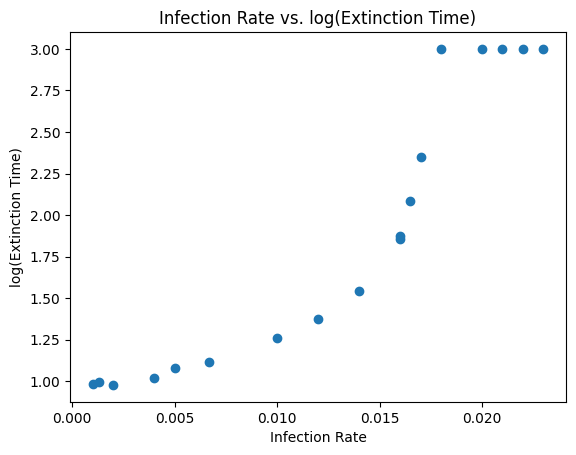

In [15]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(extinction_times))
plt.title('Infection Rate vs. log(Extinction Time)')
plt.ylabel('log(Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()


In [1]:
y = [9.607973536654251, 9.953029944742216, 9.492011539305148, 10.483571141606202, 12.015411580341686, 13.012964027656787, 18.139969589047176, 23.79167786660411, 35.100200154965435, 72.04020068397375, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 74.9147379787459, 121.0618461107636, 222.08277318272243]
b_array = [1/1000, 1/750, 1/500, 1/250, 1/200, 1/150, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.021, 0.022, 0.023, 0.016, 0.0165, 0.017]

import numpy as np

model = []

for b in b_array:
    estimate = (np.log(N) + 1) / (1-(2*M*b/N))
    model.append(estimate)


import matplotlib.pyplot as plt
import numpy as np
plt.scatter(b_array, np.log10(y))
plt.plot([1/60, 1/60], [1, 3])
plt.plot(b_array, np.log10(model))
plt.title('Infection Rate vs. log(Extinction Time)')
plt.ylabel('log(Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()


NameError: name 'N' is not defined

In [ ]:
(es)
